<a href="https://colab.research.google.com/github/SAR2652/Quora-Insincere-Questions-Classification/blob/main/Quora_Insincere_Questions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Aug 23 19:55:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -q kaggle tensorflow-gpu

     |████████████████████████████████| 320.4MB 46kB/s 


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
!chmod 600 kaggle.json

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
%cd /content

/content


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification

 88% 14.0M/15.8M [00:00<00:00, 22.0MB/s]
100% 15.8M/15.8M [00:00<00:00, 27.0MB/s]
 89% 49.0M/54.9M [00:01<00:00, 23.2MB/s]
100% 54.9M/54.9M [00:01<00:00, 42.1MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 37.7MB/s]
100% 5.95G/5.96G [02:15<00:00, 25.5MB/s]
100% 5.96G/5.96G [02:15<00:00, 47.2MB/s]


In [ ]:
!ls -a

.   .config  embeddings.zip  sample_submission.csv.zip	train.csv.zip
..  drive    sample_data     test.csv.zip


In [ ]:
# !unzip \*.zip
!unzip train.csv.zip
!unzip test.csv.zip
!unzip embeddings.zip glove.840B.300d/glove.840B.300d.txt

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  embeddings.zip
  inflating: glove.840B.300d/glove.840B.300d.txt  


In [ ]:
!head glove.840B.300d/glove.840B.300d.txt

, -0.082752 0.67204 -0.14987 -0.064983 0.056491 0.40228 0.0027747 -0.3311 -0.30691 2.0817 0.031819 0.013643 0.30265 0.0071297 -0.5819 -0.2774 -0.062254 1.1451 -0.24232 0.1235 -0.12243 0.33152 -0.006162 -0.30541 -0.13057 -0.054601 0.037083 -0.070552 0.5893 -0.30385 0.2898 -0.14653 -0.27052 0.37161 0.32031 -0.29125 0.0052483 -0.13212 -0.052736 0.087349 -0.26668 -0.16897 0.015162 -0.0083746 -0.14871 0.23413 -0.20719 -0.091386 0.40075 -0.17223 0.18145 0.37586 -0.28682 0.37289 -0.16185 0.18008 0.3032 -0.13216 0.18352 0.095759 0.094916 0.008289 0.11761 0.34046 0.03677 -0.29077 0.058303 -0.027814 0.082941 0.1862 -0.031494 0.27985 -0.074412 -0.13762 -0.21866 0.18138 0.040855 -0.113 0.24107 0.3657 -0.27525 -0.05684 0.34872 0.011884 0.14517 -0.71395 0.48497 0.14807 0.62287 0.20599 0.58379 -0.13438 0.40207 0.18311 0.28021 -0.42349 -0.25626 0.17715 -0.54095 0.16596 -0.036058 0.08499 -0.64989 0.075549 -0.28831 0.40626 -0.2802 0.094062 0.32406 0.28437 -0.26341 0.11553 0.071918 -0.47215 -0.18366 -0.3

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)
import nltk, string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, TweetTokenizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, GlobalMaxPooling1D, \
Embedding, LSTM, Input, concatenate, SpatialDropout1D, Masking, BatchNormalization, Dropout

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0


In [ ]:
train_df.tail()

,qid,question_text,target
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a computer science undergrad other than c and c++?,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA or like India there are more IT jobs present?,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on biochemistry at UG level?,0
1306121,ffffed09fedb5088744a,Who wins in a battle between a Wolverine and a Puma?,0


In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arrogant when they get just a little bit of wealth and p...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineering and BMS college of engineering? Should I wait ...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitioner?
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [ ]:
test_df.tail()

,qid,question_text
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in indua?
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal parties?
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Telugu?
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?
375805,fffff85473f4699474b0,Climate change is a worrying topic. How much time do we have left to find another planet? I mean...


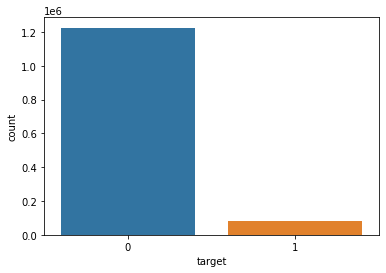

In [ ]:
sns.countplot(train_df['target'])

In [ ]:
print(train_df['question_text'][train_df['target'] == 1].values[:1000])

['Has the United States become the largest dictatorship in the world?'
 'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?'
 "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?"
 'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?'
 'Which races have the smallest penis?'
 'Why do females find penises ugly?'
 'How do I marry an American woman for a Green Card? How much do they charge?'
 "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?"
 'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?'
 "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually restricted the ability of states to make their own laws?"
 'Would Euro

In [ ]:
X = train_df['question_text']
y = train_df['target']

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
df = pd.DataFrame()
df['question_text'] = train_df.loc[:, 'question_text']
df.head()

,question_text
0,How did Quebec nationalists see their province as a nation in the 1960s?
1,"Do you have an adopted dog, how would you encourage people to adopt and not shop?"
2,Why does velocity affect time? Does velocity affect space geometry?
3,How did Otto von Guericke used the Magdeburg hemispheres?
4,Can I convert montra helicon D to a mountain bike by just changing the tyres?


# Exploratory Data Analysis (EDA)

In [ ]:
question_texts = df['question_text'].str.cat(sep = ' ')

In [ ]:
# tokenize text into words
tokens = word_tokenize(question_texts)

In [ ]:
# Code to remove punctuation
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

In [ ]:
# generate a vocabulary of words from all questions
vocabulary = set(stripped)
len(vocabulary)

287477

In [ ]:
# delete stop words from the text
stop_words = set(stopwords.words('english'))
final_tokens = [w for w in stripped if not w in stop_words]

In [ ]:
# Obtain 25 most frequent words in the corpus
frequency_dist = nltk.FreqDist(final_tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:25]

['',
 'What',
 'I',
 'How',
 'Why',
 'Is',
 'get',
 'best',
 'people',
 'Can',
 'would',
 'like',
 'Which',
 'nt',
 'Do',
 'good',
 'If',
 'one',
 'India',
 'Are',
 'make',
 'think',
 'many',
 'Does',
 'much']

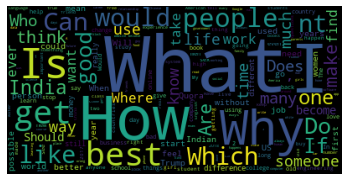

In [ ]:
# generate Word Cloud
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Split data into training and testing sets randomly.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

# Method 1: Baseline Model

## Step 1: Preprocessing for Baseline Model
We convert words into numerical vectors and calculate TF-IDF (Term Frequency times Inverse Document Frequency) for each word present in each document (question) using the TfidfVectorizer() class provided in the scikit-learn library.


**Note :**
1. Term Frequency (TF) = (Number of times term t appears in a document) / (Number of terms in the document)
2. Inverse Document Frequency (IDF) = log(N / n), where,
    * N is the number of documents &
    * n is the number of documents a term t has appeared in. 
3. The IDF of a rare word is high, whereas the IDF of a frequent word is likely to be low. Thus having the effect of highlighting words that are distinct.
4. We calculate TF-IDF value of a term as = TF * IDF

In [ ]:
tfidf = TfidfVectorizer()
train_vectors = tfidf.fit_transform(X_train)
val_vectors = tfidf.transform(X_val)

In [ ]:
train_vectors.shape

(979591, 167373)

In [ ]:
val_vectors.shape

(326531, 167373)

## Step 2: Training Baseline Model
We evaluate accuracy for two types of algorithms namely :
1. Multinomial Naive Bayes
2. Logistic Regression (Linear Model)  

### 1. Multinomial Naive Bayes Algorithm

In [ ]:
mnb = MultinomialNB()
mnb.fit(train_vectors, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.score(val_vectors, y_val)

0.9411908823358273

### 2. Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_vectors, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.score(val_vectors, y_val)

0.9533153054380747

## Step 3: Text Preprocessing using Tokenization and Lemmatization

In [ ]:
def preprocess(text):
    tokens = word_tokenize(text)
    wn = WordNetLemmatizer()
    lemmas = [wn.lemmatize(w) for w in tokens]
    preprocessed_text = " ".join(lemmas)
    return preprocessed_text

In [ ]:
X = pd.Series([preprocess(x) for x in list(X)])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

In [ ]:
tfidf = TfidfVectorizer()
train_vectors = tfidf.fit_transform(X_train)
val_vectors = tfidf.transform(X_val)

We observe that our baseline model yields a very high accuracy but unfortunately this method is not sufficient as it cannot capture contextual information present within the question text.

## Step 4: Retraining Model
We evaluate accuracy again for our text data for two types of algorithms namely :
1. Multinomial Naive Bayes
2. Stochastic Gradient Classifier (Linear Model)  


### 1. Multinomial Naive Bayes Algorithm



In [ ]:
mnb = MultinomialNB()
mnb.fit(train_vectors, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.score(val_vectors, y_val)

0.9409152576631316

### 2. Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_vectors, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.score(val_vectors, y_val)

0.9529386183853906

We observe that lemmatization leads to a slight decrease in the accuracy of both our trained models. This may be due to the fact that contextual information present in the text such as suffixes representing tense (-ing, -ed) are lost upon reducing the original word to the lemma. 

# Method 2: Feature Engineering

###### **Note**: This method is independent of the previously used baseline model as words upon conversion to tf-idf are converted into a SciPy Sparse Matrix form instead of a Pandas DataFrame. Hence Feature Engineering techniques need to be used to build a separate Text Classification Model.

## Phase 1: Feature Engineering to generate Count Based and Demographical Features

In this method, we perform Feature Engineering on the questions. Some of the methods used for the same are :
1. Finding Length (number of characters including whitespaces) of each question.
2. Number of Capital Letters.
3. Ratio of the Number of Capital Letters to the Length of the question.
4. Number of Question (?) Marks in a question
4. Number of Exclamation (!) Marks in a question
5. Number of Other Punctuation marks used in a question
6. Number of Symbols
7. Number of Words in a question
8. Number of Unique Words in a question
9. Total Number of Words vs the Number of Unique Words
10. Mean Length of words per question. 

Other Unorthodox Methods :
1. Counting the Number of Smilies (for eg. ':-)')
2. Counting the Number of Sad Faces (for eg. ':-<')
3. Checking if a word in a question is a title or not.

In [ ]:
# Finding Length of each question
df['length'] = df['question_text'].apply(lambda x: len(x))

In [ ]:
# Analyzing Capital Letters in each question
df['capitals'] = df['question_text'].apply(lambda question: sum(1 for c in question if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals']) / float(row['length']),axis=1)

In [ ]:
# Exploring number of words and their uniqueness in each question as well as mean length of all words in a question
df['num_words'] = df['question_text'].apply(lambda question: len(word_tokenize(question)))
df['num_unique_words'] = df['question_text'].apply(lambda question: len(set(w for w in question.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
df["mean_word_len"] = df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
# Generating features from punctuation
df['num_exclamation_marks'] = df['question_text'].apply(lambda question: question.count('!'))
df['num_question_marks'] = df['question_text'].apply(lambda question: question.count('?'))
df['num_punctuation'] = df['question_text'].apply(lambda question: sum(question.count(w) for w in '.,;:'))
df['num_symbols'] = df['question_text'].apply(lambda question: sum(question.count(w) for w in '*&$%'))
df['punct_percent']= df['num_punctuation'] * 100 / df['num_words']

In [ ]:
# Checking the presence of emojis in each question
df['num_smilies'] = df['question_text'].apply(lambda question: sum(question.count(w) for w in (':-)', ':)', ';-)', ';)')))
df['num_sad'] = df['question_text'].apply(lambda question: sum(question.count(w) for w in (':-<', ':()', ';-()', ';(')))

In [ ]:
# Checking if a particular word is a title within a question
df["count_words_title"] = df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Phase 2: Feature Engineering to generate features from Bad / Inappropriate words

In this method, we perform Feature Engineering on the questions relating to bad / inappropriate words. Some of the methods used for the same are :
1. Count the number of bad words of question.
2. Number of Characters in the question.
3. Ratio of number of bad words to the number of characters.
4. Ratio of number of bad words to the total number of words in the question.

In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/english.csv" "english.txt"  

In [ ]:
!ls -a

.	 drive		 glove.840B.300d	    test.csv	  train.csv.zip
..	 embeddings.zip  sample_data		    test.csv.zip
.config  english.txt	 sample_submission.csv.zip  train.csv


In [ ]:
f = open('english.txt', 'r')
bad_words = [word for word in f.readlines()]

In [ ]:
df["badwordcount"] = df['question_text'].apply(lambda question: sum(question.count(w) for w in bad_words))
df['num_chars'] =    df['question_text'].apply(len)
df["normchar_badwords"] = df["badwordcount"] / df['num_chars']
df["normword_badwords"] = df["badwordcount"] / df['num_words']

## Phase 3: Feature Engineering using Part of Speech (POS) Tagging

### Function to tag Parts of Speech 

In [ ]:
def tag_part_of_speech(text):
    text_splited =  text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN', 'NNP', 'NNPS', 'NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ', 'JJR', 'JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ')])
    return[noun_count, adjective_count, verb_count]

In [ ]:
df['nouns'], df['adjectives'], df['verbs'] = zip(*df['question_text'].apply(lambda question: tag_part_of_speech(question)))

### Nouns

In [ ]:
df['nouns_vs_length'] = df['nouns'] / df['length']
df['nouns_vs_words'] = df['nouns'] / df['num_words']

### Adjectives

In [ ]:
df['adjectives_vs_length'] = df['adjectives'] / df['length']
df['adjectives_vs_words'] = df['adjectives'] / df['num_words']

### Verbs

In [ ]:
df['verbs_vs_length'] = df['verbs'] / df['length']
df['verbs_vs_words'] = df['verbs'] / df['num_words']

In [ ]:
df.head()

,question_text,length,capitals,caps_vs_length,num_words,num_unique_words,words_vs_unique,mean_word_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,punct_percent,num_smilies,num_sad,count_words_title,badwordcount,num_chars,normchar_badwords,normword_badwords,nouns,adjectives,verbs,nouns_vs_length,nouns_vs_words,adjectives_vs_length,adjectives_vs_words,verbs_vs_length,verbs_vs_words
0,How did Quebec nationalists see their province as a nation in the 1960s?,72,2,0.027778,14,13,0.928571,4.615385,0,1,0,0,0.000000,0,0,2,0,72,0.0,0.0,5,0,2,0.069444,0.357143,0.000000,0.000000,0.027778,0.142857
1,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",81,1,0.012346,18,15,0.833333,4.125000,0,1,1,0,5.555556,0,0,1,0,81,0.0,0.0,2,0,6,0.024691,0.111111,0.000000,0.000000,0.074074,0.333333
2,Why does velocity affect time? Does velocity affect space geometry?,67,2,0.029851,12,8,0.666667,5.800000,0,2,0,0,0.000000,0,0,2,0,67,0.0,0.0,6,1,2,0.089552,0.500000,0.014925,0.083333,0.029851,0.166667
3,How did Otto von Guericke used the Magdeburg hemispheres?,57,4,0.070175,10,9,0.900000,5.444444,0,1,0,0,0.000000,0,0,4,0,57,0.0,0.0,5,0,2,0.087719,0.500000,0.000000,0.000000,0.035088,0.200000
4,Can I convert montra helicon D to a mountain bike by just changing the tyres?,77,3,0.038961,16,15,0.937500,4.200000,0,1,0,0,0.000000,0,0,3,0,77,0.0,0.0,5,1,2,0.064935,0.312500,0.012987,0.062500,0.025974,0.125000


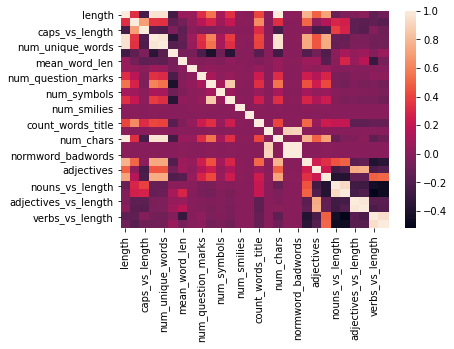

In [ ]:
sns.heatmap(df.drop(['question_text'], axis = 1).corr())

## Phase 3: Developing Text Classification Model

In [ ]:
X = df.drop(['question_text'], axis = 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

Multinomial Naive Bayes Classifier

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.score(X_val, y_val)

0.8894775687453871

We observe that the Niave Bayes Algorithm does not perform particularly well on numeric data. 

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.score(X_val, y_val)

0.9379997611252837

We observe that Logistic Regression performs consistently well upon the current model due to the problem being constrained to binary (2) classes, in which cases, Logistic Regression performs exceptionally well. Also, Logistic Regression being a linear model deals better with data vectors and sparse matrices.

# Method 3: GloVe Embeddings
The Global Vectors for Word Representation, or GloVe algorithm is an extension to the word2vec method for efficiently learning word vectors. GloVe constructs an explicit word-context or word co-occurrence matrix using statistics across the whole text corpus. The result is a learning model that may result in generally better word embeddings.

In [ ]:
# configuration values
embed_size = 300 # how big word vector is
max_features = 95000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 75 # max number of words in a question to use
embedding_path = 'glove.840B.300d/glove.840B.300d.txt' # path to embedding

In [ ]:
print('Average word length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Average word length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x.split())))))

Average word length of questions in train is 13.
Average word length of questions in test is 13.


In [ ]:
print('Max word length of questions in train is {0:.0f}.'.format(np.max(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Max word length of questions in test is {0:.0f}.'.format(np.max(test_df['question_text'].apply(lambda x: len(x.split())))))

Max word length of questions in train is 134.
Max word length of questions in test is 87.


In [ ]:
print('Average character length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x)))))
print('Average character length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x)))))

Average character length of questions in train is 71.
Average character length of questions in test is 71.


Tokenize both training and testing data and lower case any capital words used as well as keeping number of features (vectors) limited to 95000 and max length of tuple to 75

We train the tokenizer on both the training and testing data so as to generate a vocabulary of words and their corresponding index assigned by the tokenizer. The number of words in the vocabulary is constrained by the max_features hyperparameter.

In [ ]:
tk = Tokenizer(lower = True, filters='', num_words=max_features)
full_text = list(train_df['question_text'].values) + list(test_df['question_text'].values)
tk.fit_on_texts(full_text)

The next step is converting the sentence into a sequence of indices allotted by the tokenizer to each word for processing using the Embedding Layer that we will use later in our RNN

Reference: https://stackoverflow.com/questions/45649520/explain-with-example-how-embedding-layers-in-keras-works/

In [ ]:
train_tokenized = tk.texts_to_sequences(train_df['question_text'].fillna('missing'))
test_tokenized = tk.texts_to_sequences(test_df['question_text'].fillna('missing'))

In [ ]:
train_tokenized[:10]

[[9, 49, 10881, 10283, 149, 54, 8359, 36, 4, 1802, 6, 1, 16331],
 [11, 14, 24, 29, 4270, 12005, 9, 35, 14, 3712, 41, 5, 3145, 10, 45, 6480],
 [16, 26, 2311, 307, 227, 26, 2311, 307, 591, 11613],
 [9, 49, 17413, 9589, 113, 1, 74025],
 [15, 8, 998, 82183, 2890, 5, 4, 3552, 1851, 46, 87, 1434, 1, 25407],
 [3, 14180, 4984, 632, 93269, 82184, 22, 13, 9291],
 [16,
  26,
  138,
  2754,
  1662,
  1772,
  2878,
  32,
  54827,
  61,
  26,
  45,
  11,
  1,
  135,
  13,
  1287,
  3980],
 [3, 17, 2505, 20, 8, 3001, 22, 6714, 18, 18886, 1783, 18647, 12, 24110],
 [3, 38, 181, 4, 183, 36, 8728, 10, 20, 514, 9, 3, 19, 122, 69, 8728],
 [3,
  17,
  87,
  62,
  22,
  24,
  14,
  84,
  100,
  6,
  68,
  2485,
  19100,
  14,
  1224,
  3931,
  5,
  1,
  41,
  14,
  692,
  34964,
  885,
  25919,
  54,
  53,
  14,
  33,
  5,
  24,
  190,
  97,
  28,
  76,
  10,
  94,
  9107,
  42,
  9,
  49,
  140,
  1740]]

Text(0.5, 1.0, 'Distribution of question text length in characters')

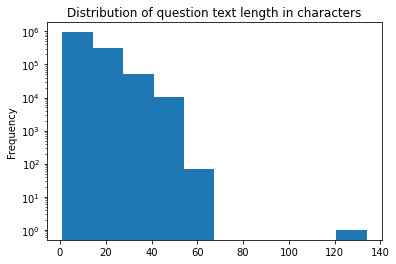

In [ ]:
train_df['question_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of question text length in characters')

We use pre-padding method to equalize the length of all sequences to 75. Since no word in the vocabulary is assigned the index 0, it is the ideal value to be used for padding the sequences

In [ ]:
X_train = pad_sequences(train_tokenized, maxlen = maxlen)
X_test = pad_sequences(test_tokenized, maxlen = maxlen)

In [ ]:
X_train[:10]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     9,
           49, 10881, 10283,   149,    54,  8359,    36,     4,  1802,
            6,     1, 16331],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     

GLoVe vector embeddings cannot be used directly and  hence must be unpacked as a dictionary with the word as the key and its corresponding value as the vector.

In [ ]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')
# return word and its corresponding 300 dimensional vector as a dictionary
embedding_index = dict(get_coefs(*o.split(" ")) for o in open(embedding_path, encoding='utf-8', errors='ignore'))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
# Create a 2D numpy array of dimensions 840B x 300D using only the vector values of words 
all_embs = np.stack(embedding_index.values())

In [ ]:
# Extract mean and standard deviation of vector values to be used for replacing missing values
emb_mean,emb_std = all_embs.mean(), all_embs.std()

In [ ]:
# Create vocabulary using tokenizer's assigned indices to words
word_index = tk.word_index

In [ ]:
# Decide the maximum number of words to be used from the vocabulary
nb_words = min(max_features, len(word_index))

In [ ]:
# generate a 2D matrix that comprises of values from a normal random distribution generated using Mean and Standard Deviation of the vector values
# obtained from a previous step.
# We can also initialize the entire matrix with zero values
# Matrix Dimensions = (Max Features + 1) words x 300 Dimensions
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words + 1, embed_size))

Replace the $i^{th}$ row of the mebedding matrix with the vector of the word assigned value '_i_' in the word index 

In [ ]:
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

One Hot Encode Target Variable for the Recurrent Neural Network to understand output format 

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_ohe = ohe.fit_transform(train_df['target'].values.reshape(-1, 1))

The Embedding layer is always the first layer in the Neural Network. It accepts input of the shape of the size of the vocabulary and the number of dimensions chosen (in our case, 95001 features x 300 dimensions) 

An Embedding tries to find the optimal mapping of each of the unique words to a vector of real numbers.

In [ ]:
inp = Input(shape=(maxlen, ))
x = Embedding(max_features + 1, embed_size, weights = [embedding_matrix], trainable = False)(inp)
x1 = SpatialDropout1D(rate = 0.2)(x)
x_m = Masking()(x1)
x_gru = LSTM(256)(x_m)
x = BatchNormalization()(x_gru)
x = Dropout(rate = 0.2)(Dense(128, activation='relu') (x))
x = BatchNormalization()(x)
# avg_pool = GlobalAveragePooling1D()(x_m)
# max_pool = GlobalMaxPooling1D()(x)
# conc = concatenate([avg_pool, max_pool])
# x = LSTM(100, return_sequences=True)(x)
outp = Dense(2, activation="sigmoid")(x)    
model = Model(inputs=inp, outputs=outp)

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 75)]              0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 75, 300)           28500300  
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 75, 300)           0         
_________________________________________________________________
masking_7 (Masking)          (None, 75, 300)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               570368    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3289

In [ ]:
X_train.shape

(1306122, 75)

Train on 77.5% of the data, leaving the remaining 22.5% of the data as the hold-out or validation set

In [ ]:
history = model.fit(X_train, y_ohe, batch_size = 512, epochs = 10, validation_split=0.225)

Train on 1012244 samples, validate on 293878 samples
Epoch 1/10
1012244/1012244 [==============================] - 150s 148us/sample - loss: 0.1115 - accuracy: 0.9560 - val_loss: 0.1119 - val_accuracy: 0.9562
Epoch 2/10
1012244/1012244 [==============================] - 151s 149us/sample - loss: 0.1066 - accuracy: 0.9578 - val_loss: 0.1089 - val_accuracy: 0.9572
Epoch 3/10
1012244/1012244 [==============================] - 151s 149us/sample - loss: 0.1021 - accuracy: 0.9590 - val_loss: 0.1076 - val_accuracy: 0.9578
Epoch 4/10
1012244/1012244 [==============================] - 152s 150us/sample - loss: 0.0980 - accuracy: 0.9601 - val_loss: 0.1074 - val_accuracy: 0.9579
Epoch 5/10
1012244/1012244 [==============================] - 151s 149us/sample - loss: 0.0937 - accuracy: 0.9618 - val_loss: 0.1091 - val_accuracy: 0.9581
Epoch 6/10
1012244/1012244 [==============================] - 149s 147us/sample - loss: 0.0892 - accuracy: 0.9633 - val_loss: 0.1170 - val_accuracy: 0.9571
Epoch 7/10


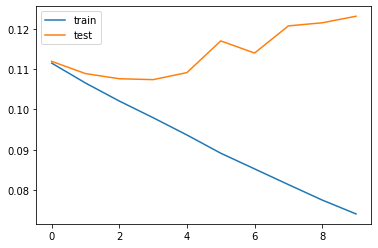

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();